In [7]:
import matplotlib.pyplot as plt
import open3d as o3d
import sys
import numpy as np
sys.path.append("../..")
sys.path.append("..")
from SorghumPartNet.data.load_raw_data import load_pcd_plyfile, load_ply_file_points

In [26]:
def normalize(points):
    # mins = np.min(points, axis=1)
    # maxs = np.max(points, axis=1)
    # mins = np.expand_dims(mins,1)
    # maxs = np.expand_dims(maxs,1)
    # points = (points - mins) / (maxs - mins) - 0.5
    # return points

    mean = np.mean(points, axis=1)
    mean = np.repeat(np.expand_dims(mean, 1),points.shape[1],1)
    std = np.std(points, axis=1)
    std = np.repeat(np.expand_dims(std, 1),points.shape[1],1)
    points = (points - mean) / std
    return points


In [27]:
# pcd_new = load_pcd_plyfile("/space/ariyanzarei/sorghum_segmentation/dataset/real_data/S11_1.ply")
pcd_syn = load_pcd_plyfile("/space/ariyanzarei/sorghum_segmentation/dataset/synthetic/2022-09-29/PointCloud/S11_1.ply")
pcd_real, _ = load_ply_file_points("/space/ariyanzarei/sorghum_segmentation/dataset/real_data/2020-07-13/PI_678119_3617_330757957491.ply")

syn_pcd = o3d.geometry.PointCloud()
syn_pcd.points = o3d.utility.Vector3dVector(normalize(pcd_syn['points']))

real_pcd = o3d.geometry.PointCloud()
real_pcd.points = o3d.utility.Vector3dVector(normalize(pcd_real))

In [29]:
o3d.visualization.draw_geometries([syn_pcd])

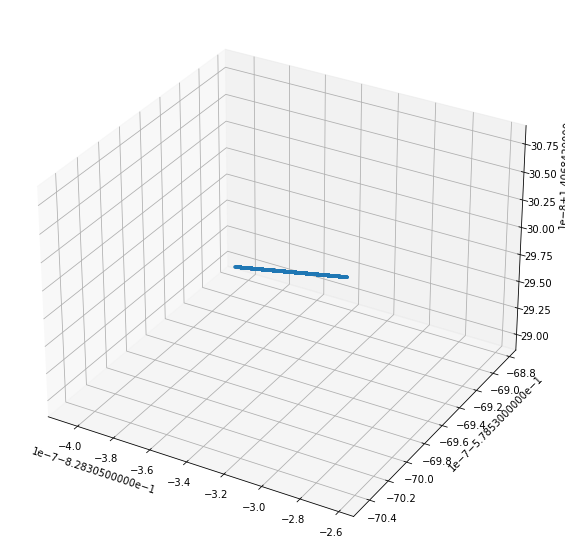

In [28]:
# points = normalize(pcd_syn['points'])
points = normalize(pcd_real)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,2], points[:,0], points[:,1],s=5)